## Contents
- [1. Introduction](#1.-Introduction)
- [2. Imports](#2.-Imports)
- [3. ID Cards](#3.-ID-Cards)
- [4. Passports](#4.-Passports)

---
### 1. Introduction
---
To conduct an EDA of the training dataset, to understand the distributions of (a) the location, (b) the area and (c) the aspect ratios of the true bounding boxes. The training dataset is made up of:
- 100 digitally generated photos of ID cards from Slovakia, Spain and Finland each (total 300)
- 100 digitally generated photos of passports from Latvia, Russia and Greece each (total 300)
- all photos are of 640 x 640 pixels (resized to fit YOLO's input format)

---
### 2. Imports
---

In [10]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

os.chdir('F:/content/datasets/id-card-passport-detection-18/train') # change directory

In [11]:
# Define relative path to folder containing the text files
files_folder = "labels/"
files = []

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=" ", names =["class", "center_x", "center_y", "width", "height"] ) for file in glob.glob(os.path.join(files_folder ,"*.txt"))]

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)

In [12]:
# find the area of the bounding boxes in pixels
files_df = files_df.reset_index(drop=True)
files_df['area'] = files_df['width'] * 640 * files_df['height'] * 640
files_df['aspect_ratio'] = files_df['width'] / files_df['height']
files_df.head()

,class,center_x,center_y,width,height,area,aspect_ratio
0,0,0.650781,0.434375,0.509375,0.239063,49878.0,2.130719
1,0,0.411719,0.358594,0.700000,0.245312,70336.0,2.853503
2,0,0.550781,0.442969,0.714063,0.275000,80432.0,2.596591
3,0,0.550781,0.389844,0.820312,0.234375,78750.0,3.500000
4,0,0.509375,0.346094,0.618750,0.245312,62172.0,2.522293


---
### 3. ID Cards
---

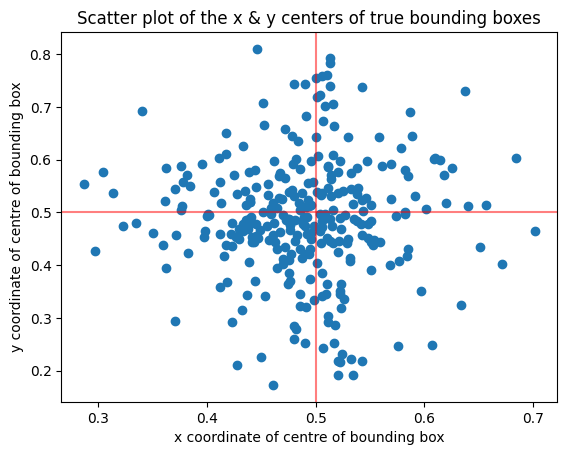

In [13]:
id_df = files_df[files_df['class'] == 0]

# scatter plot the center_x and center_y
plt.scatter(id_df['center_x'], id_df['center_y'])
plt.axhline(y = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.axvline(x = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.xlabel('x coordinate of centre of bounding box')
plt.ylabel('y coordinate of centre of bounding box')
plt.title('Scatter plot of the x & y centers of true bounding boxes')
plt.show()

Scatter plot analysis:
- most of the training samples appear near the centre of the photo
- other training samples fall along the horizontal and vertical lines cutting across the centre of the photo (indicated by the faint red lines)
- there seems to be a lack of samples near the four corners of the photo. Hence a model trained on this data may have a weakness in correctly identifying ID cards in the corners of submitted photos

(array([ 8., 22., 60., 74., 55., 43., 21., 13.,  3.,  1.]),
 array([ 13790. ,  29196.6,  44603.2,  60009.8,  75416.4,  90823. ,
        106229.6, 121636.2, 137042.8, 152449.4, 167856. ]),
 <BarContainer object of 10 artists>)

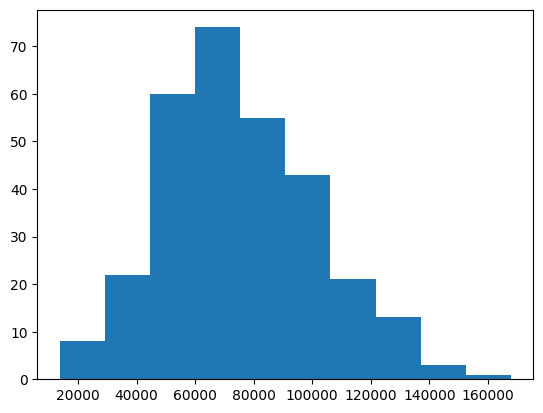

In [14]:
# histogram of area
plt.hist(id_df['area'])

Area histogram analysis:
- most training samples hover between an area of 50,000 - 100,000 pixels (35 - 50% of a full 640 * 640 pixel photo)
- there is no sample at area size near 409,600 pixels (the full size of 640 * 640 pixels). Hence a model trained on this dataset may have a weakness in identifying zoomed-in ID cards

(array([ 10.,  13.,  16.,  37., 108.,  71.,  22.,  13.,   6.,   4.]),
 array([1.66981132, 1.89596744, 2.12212357, 2.34827969, 2.57443581,
        2.80059193, 3.02674806, 3.25290418, 3.4790603 , 3.70521643,
        3.93137255]),
 <BarContainer object of 10 artists>)

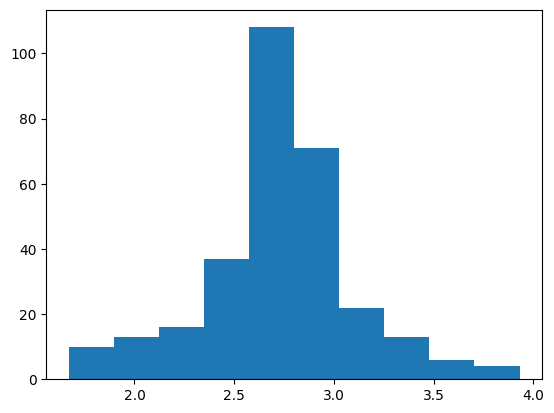

In [15]:
# histogram of aspect ratio
plt.hist(id_df['aspect_ratio'])

Aspect ratio histogram analysis:
- most training samples hoverbetween 2.5 - 3.0 aspect ratio (the standard aspect ratio of an ID card is 2.6)

---
### 4. Passports
---

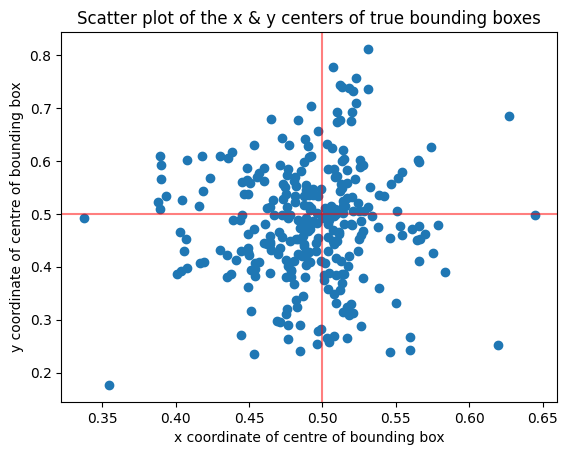

In [16]:
pass_df = files_df[files_df['class'] == 1]

# scatter plot the center_x and center_y
plt.scatter(pass_df['center_x'], pass_df['center_y'])
plt.axhline(y = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.axvline(x = 0.5, color = 'r', linestyle = '-', alpha=0.5)
plt.xlabel('x coordinate of centre of bounding box')
plt.ylabel('y coordinate of centre of bounding box')
plt.title('Scatter plot of the x & y centers of true bounding boxes')
plt.show()

Scatter plot analysis:
- most of the training samples appear near the centre of the photo
- more training samples lie along the red vertical axis than the red horizontal axis. A model trained on this data may have a weakness in correctly identifying passports on the right of the photo
- there seems to be a lack of samples near the four corners of the photo. Hence a model trained on this data may have a weakness in correctly identifying passports in the corners of submitted photos

(array([ 5., 13., 43., 84., 84., 45., 19.,  5.,  0.,  2.]),
 array([ 31536. ,  50139.3,  68742.6,  87345.9, 105949.2, 124552.5,
        143155.8, 161759.1, 180362.4, 198965.7, 217569. ]),
 <BarContainer object of 10 artists>)

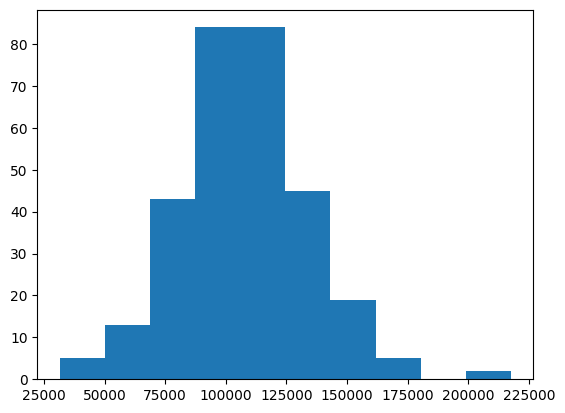

In [17]:
# histogram of area
plt.hist(pass_df['area'])

Area histogram analysis:
- similar to the ID card samples, most passport training samples hover between an area of 80,000 - 125,000 pixels (40 - 55% of a full 640 * 640 pixel photo)
- there is no sample at area size near 409,600 pixels (the full size of 640 * 640 pixels). Hence a model trained on this dataset may have a weakness in identifying zoomed-in passports

(array([  9.,  19.,  51., 113.,  66.,  31.,   8.,   2.,   0.,   1.]),
 array([1.58333333, 1.83768657, 2.0920398 , 2.34639303, 2.60074627,
        2.8550995 , 3.10945274, 3.36380597, 3.6181592 , 3.87251244,
        4.12686567]),
 <BarContainer object of 10 artists>)

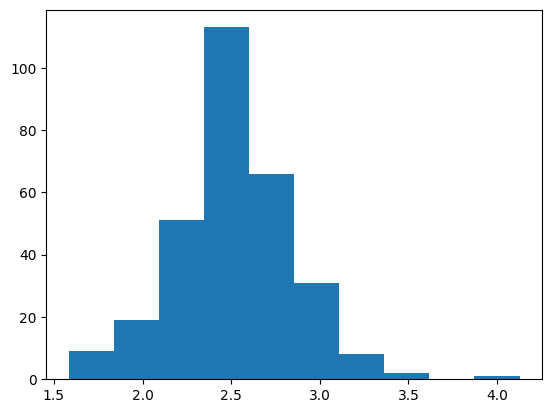

In [18]:
# histogram of aspect ratio
plt.hist(pass_df['aspect_ratio'])

Aspect ratio histogram analysis:
- most training samples hover around 2.5 aspect ratio (the standard aspect ratio of an passport is 2.6)